In [ ]:
# COLAB 환경을 위한 나눔고딕 한글폰트 설치  --> 진행 후,  런타임 > 런타임 다시 시작을 해 주세요. 다시 시작 후에는 이 부분 실행 X
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['NanumBarunGothic', 'Malgun Gothic', 'AppleGothic']  # 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 파이캐럿 환경설정

In [3]:
# sklearn 버전 확인
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
!pip install pycaret

In [5]:
# 분류 패키지의 모든 모듈 임포트
from pycaret.classification import *
from pycaret.regression import *

In [6]:
# 라이브러리 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# 디렉토리 변경 후 확인
!pwd
%cd /content/drive/MyDrive/Colab Notebooks/p23_BML
!pwd

/content
/content/drive/MyDrive/Colab Notebooks/p23_BML
/content/drive/MyDrive/Colab Notebooks/p23_BML


In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 데이터 불러오기

In [9]:
df = pd.read_csv('final/data/combined_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        500 non-null    object 
 1   artist_name       500 non-null    object 
 2   popularity        500 non-null    float64
 3   danceability      500 non-null    float64
 4   energy            500 non-null    float64
 5   key               500 non-null    float64
 6   loudness          500 non-null    float64
 7   mode              500 non-null    float64
 8   speechiness       500 non-null    float64
 9   acousticness      500 non-null    float64
 10  instrumentalness  500 non-null    float64
 11  liveness          500 non-null    float64
 12  valence           500 non-null    float64
 13  tempo             500 non-null    float64
 14  type              500 non-null    object 
 15  duration_ms       500 non-null    float64
 16  added_year        500 non-null    int64  
 1

In [129]:
df[df['prob_emotion']>0.5].shape

(28, 27)

In [ ]:
# 수치형 변수의 컬럼명 추출
num_cols = df.select_dtypes(include='number').columns.tolist()
print(num_cols)
print(len(num_cols))

['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'added_year', 'added_month', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'prob_emotion']
22


In [ ]:
# 범주형 변수
cat_cols = ['type','added_month','added_day','pred_emotion']
for i in cat_cols:
  print("*"*14)
  print(df.groupby(i).size().sort_values(ascending=False))
  print("*"*14)

**************
type
audio_features    500
dtype: int64
**************
**************
added_month
4     55
5     54
6     54
11    51
10    46
1     44
3     39
8     37
2     36
12    31
9     28
7     25
dtype: int64
**************
**************
added_day
Fri    377
Thu     45
Tue     27
Mon     21
Wed     15
Sat      8
Sun      7
dtype: int64
**************
**************
pred_emotion
anger       157
sadness     107
joy          88
surprise     65
disgust      54
fear         28
dtype: int64
**************


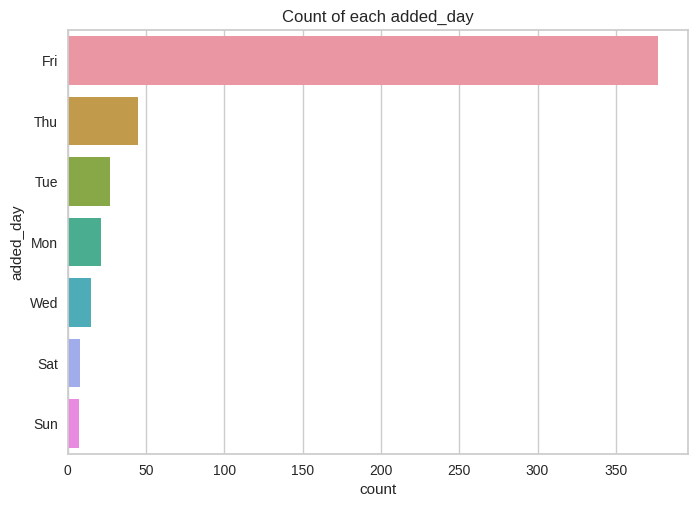

In [ ]:
sorted_values = df['added_day'].value_counts().sort_values(ascending=False)
sns.countplot(y='added_day', data=df, order=sorted_values.index)
plt.title("Count of each added_day")
plt.show()

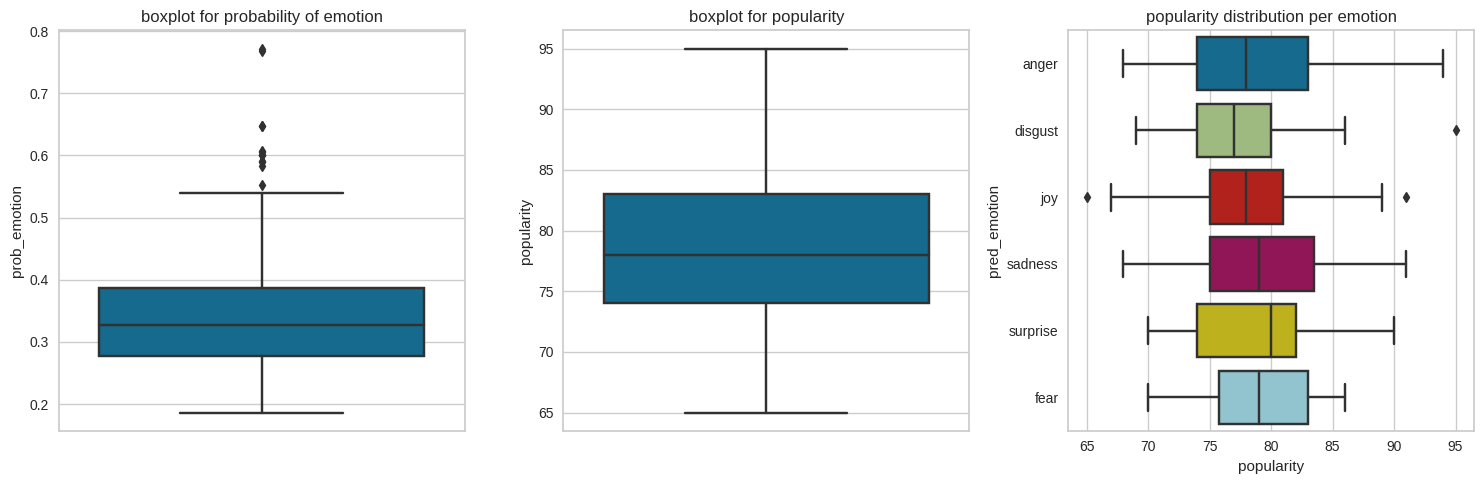

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=df, y='prob_emotion', ax=ax[0], showfliers=True)
ax[0].set_ylabel('prob_emotion')
ax[0].set_title('boxplot for probability of emotion')

sns.boxplot(data=df, y='popularity', ax=ax[1], showfliers=True)
ax[1].set_ylabel('popularity')
ax[1].set_title('boxplot for popularity')

sns.boxplot(data=df, x='popularity', y='pred_emotion', ax=ax[2], showfliers=True)
ax[2].set_xlabel('popularity')
ax[2].set_ylabel('pred_emotion')
ax[2].set_title('popularity distribution per emotion')

plt.tight_layout()
plt.show()

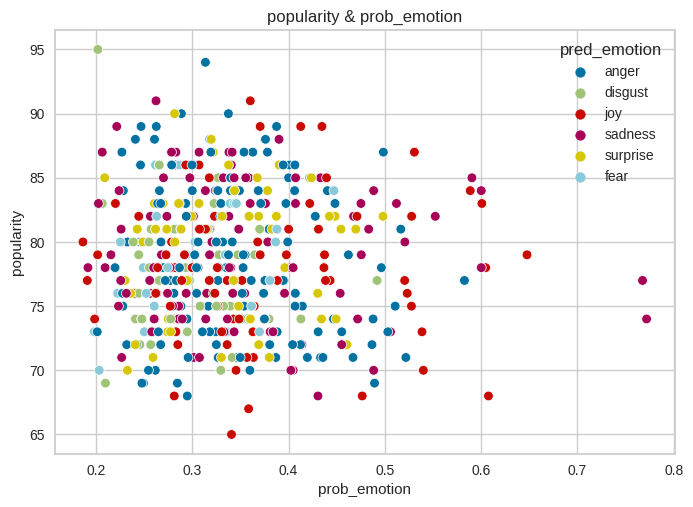

In [ ]:
# 산점도 그리기
sns.scatterplot(data=df, x='prob_emotion', y='popularity', hue='pred_emotion')
plt.xlabel('prob_emotion')
plt.ylabel('popularity')
plt.title('popularity & prob_emotion')
plt.show()

In [ ]:
# prob_emtoin 이상치(IQR 기준) 확인
Q1 = df['prob_emotion'].quantile(0.25)
Q3 = df['prob_emotion'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['prob_emotion'] < lower_bound) | (df['prob_emotion'] > upper_bound)]
outliers

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,added_year,added_month,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion
14,Lost in the Fire (feat. The Weeknd),Gesaffelstein,85.0,0.658,0.671,2.0,-12.210,1.0,0.0363,0.0933,0.000927,0.1150,0.166,100.966,audio_features,202093.0,2019,3,Fri,0.076470,0.036886,0.089445,0.052893,0.590432,0.153875,0.590432,sadness
54,Higher Love,Kygo,78.0,0.693,0.678,8.0,-7.159,1.0,0.0324,0.0151,0.000006,0.1010,0.404,103.952,audio_features,228267.0,2019,6,Fri,0.044763,0.069088,0.064429,0.604712,0.150890,0.066118,0.604712,joy
64,i'm so tired...,Lauv,77.0,0.548,0.735,11.0,-7.572,1.0,0.2360,0.1730,0.000000,0.1950,0.498,101.252,audio_features,162587.0,2020,3,Fri,0.039123,0.028506,0.048705,0.066407,0.767634,0.049625,0.767634,sadness
120,I Like Me Better,Lauv,84.0,0.753,0.505,9.0,-7.621,1.0,0.2550,0.5340,0.000003,0.1040,0.419,91.972,audio_features,197437.0,2018,5,Thu,0.081831,0.169161,0.042061,0.588650,0.060981,0.057316,0.588650,joy
237,I Feel It Coming,The Weeknd,83.0,0.773,0.819,0.0,-5.946,0.0,0.1180,0.4280,0.000000,0.0679,0.585,92.987,audio_features,269187.0,2016,11,Fri,0.046133,0.043556,0.180205,0.600754,0.081460,0.047891,0.600754,joy
268,1-800-273-8255,Logic,78.0,0.620,0.574,5.0,-7.788,0.0,0.0479,0.5690,0.000000,0.1900,0.357,100.023,audio_features,250173.0,2017,5,Fri,0.097619,0.078004,0.091064,0.079865,0.600150,0.053298,0.600150,sadness
327,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,82.0,0.664,0.714,7.0,-6.645,0.0,0.1110,0.0353,0.000008,0.0843,0.710,101.969,audio_features,197933.0,2016,5,Fri,0.106804,0.067807,0.079955,0.096901,0.552357,0.096176,0.552357,sadness
339,Renegades,X Ambassadors,79.0,0.526,0.862,2.0,-6.003,1.0,0.0905,0.0144,0.059700,0.2290,0.528,90.052,audio_features,195200.0,2015,6,Tue,0.078708,0.041629,0.122057,0.647634,0.043007,0.066965,0.647634,joy
366,Alone,Marshmello,74.0,0.631,0.953,2.0,-3.739,1.0,0.0343,0.0241,0.015500,0.1080,0.422,141.990,audio_features,273803.0,2016,5,Fri,0.059309,0.080510,0.053351,0.014838,0.771841,0.020151,0.771841,sadness
394,Sweet Lovin' - Radio Edit,Sigala,68.0,0.680,0.850,10.0,-2.785,1.0,0.0661,0.2070,0.000002,0.3390,0.710,124.942,audio_features,202213.0,2018,9,Fri,0.101319,0.053289,0.053163,0.607581,0.090720,0.093928,0.607581,joy


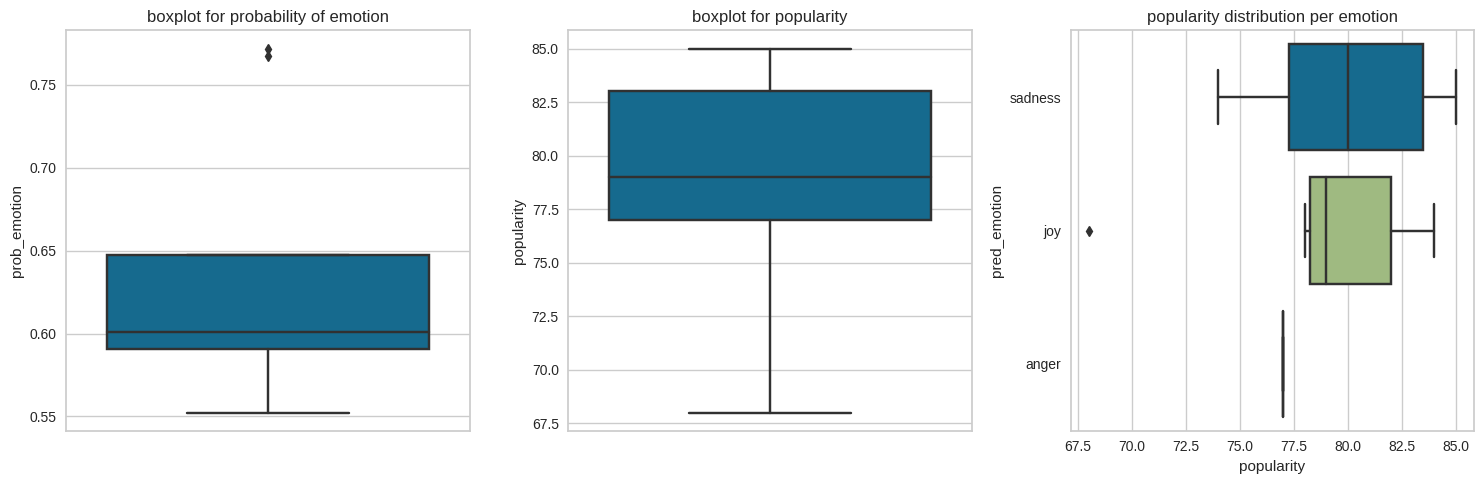

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=outliers, y='prob_emotion', ax=ax[0], showfliers=True)
ax[0].set_ylabel('prob_emotion')
ax[0].set_title('boxplot for probability of emotion')

sns.boxplot(data=outliers, y='popularity', ax=ax[1], showfliers=True)
ax[1].set_ylabel('popularity')
ax[1].set_title('boxplot for popularity')

sns.boxplot(data=outliers, x='popularity', y='pred_emotion', ax=ax[2], showfliers=True)
ax[2].set_xlabel('popularity')
ax[2].set_ylabel('pred_emotion')
ax[2].set_title('popularity distribution per emotion')

plt.tight_layout()
plt.show()

# 파이캐럿으로 분석

### regression -- 실패

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        500 non-null    object 
 1   artist_name       500 non-null    object 
 2   popularity        500 non-null    float64
 3   danceability      500 non-null    float64
 4   energy            500 non-null    float64
 5   key               500 non-null    float64
 6   loudness          500 non-null    float64
 7   mode              500 non-null    float64
 8   speechiness       500 non-null    float64
 9   acousticness      500 non-null    float64
 10  instrumentalness  500 non-null    float64
 11  liveness          500 non-null    float64
 12  valence           500 non-null    float64
 13  tempo             500 non-null    float64
 14  type              500 non-null    object 
 15  duration_ms       500 non-null    float64
 16  added_year        500 non-null    int64  
 1

In [11]:
drop_cols = ['track_name','artist_name', 'added_year']
data = df.drop(columns=drop_cols)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        500 non-null    float64
 1   danceability      500 non-null    float64
 2   energy            500 non-null    float64
 3   key               500 non-null    float64
 4   loudness          500 non-null    float64
 5   mode              500 non-null    float64
 6   speechiness       500 non-null    float64
 7   acousticness      500 non-null    float64
 8   instrumentalness  500 non-null    float64
 9   liveness          500 non-null    float64
 10  valence           500 non-null    float64
 11  tempo             500 non-null    float64
 12  type              500 non-null    object 
 13  duration_ms       500 non-null    float64
 14  added_year        500 non-null    int64  
 15  added_month       500 non-null    int64  
 16  added_day         500 non-null    object 
 1

In [14]:
s = setup(data, target = 'popularity', session_id = 123, profile=True)

,Description,Value
0,Session id,123
1,Target,popularity
2,Target type,Regression
3,Original data shape,"(500, 25)"
4,Transformed data shape,"(500, 36)"
5,Transformed train set shape,"(350, 36)"
6,Transformed test set shape,"(150, 36)"
7,Numeric features,21
8,Categorical features,3
9,Rows with missing values,0.2%


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


In [15]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,4.4844,29.2115,5.3860,-0.0414,0.0678,0.0574,0.1350
br,Bayesian Ridge,4.4979,29.3023,5.3958,-0.0460,0.0679,0.0575,0.0990
huber,Huber Regressor,4.4929,29.4343,5.4079,-0.0509,0.0679,0.0573,0.1920
rf,Random Forest Regressor,4.4228,29.4221,5.4022,-0.0518,0.0679,0.0566,0.4730
omp,Orthogonal Matching Pursuit,4.4872,29.5707,5.4173,-0.0537,0.0682,0.0574,0.0960
en,Elastic Net,4.4814,29.5813,5.4192,-0.0543,0.0682,0.0573,0.1000
lasso,Lasso Regression,4.5038,29.6007,5.4221,-0.0555,0.0682,0.0576,0.1030
llar,Lasso Least Angle Regression,4.5038,29.6007,5.4221,-0.0555,0.0682,0.0576,0.1010
ridge,Ridge Regression,4.5429,30.2017,5.4667,-0.0773,0.0688,0.0582,0.1010
ada,AdaBoost Regressor,4.5151,30.0319,5.4666,-0.0802,0.0686,0.0576,0.4750


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### Clustering

In [16]:
from pycaret.clustering import *

In [17]:
s = setup(data, normalize = False, profile=True, session_id = 16)

,Description,Value
0,Session id,16
1,Original data shape,"(500, 25)"
2,Transformed data shape,"(500, 36)"
3,Numeric features,22
4,Categorical features,3
5,Rows with missing values,0.2%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


In [27]:
# functional API
kmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5350,758.7638,0.5800,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
print(kmeans)

KMeans(n_clusters=3, random_state=16)


In [29]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion,Cluster
0,80.0,0.878,0.619,6.0,-5.560,1.0,0.1020,0.0533,0.000000,0.1130,...,Fri,0.232579,0.146238,0.152115,0.168469,0.160648,0.139951,0.232579,anger,Cluster 0
1,85.0,0.701,0.425,7.0,-10.965,1.0,0.3750,0.3280,0.130000,0.1000,...,Fri,0.187535,0.421619,0.082860,0.104895,0.156287,0.046803,0.421619,disgust,Cluster 0
2,83.0,0.759,0.548,9.0,-6.049,0.0,0.0290,0.0392,0.000000,0.0828,...,Wed,0.062083,0.103979,0.102877,0.306972,0.287127,0.136963,0.306972,joy,Cluster 0
3,86.0,0.778,0.317,1.0,-10.732,0.0,0.3340,0.5920,0.000000,0.0881,...,Fri,0.149837,0.158068,0.043229,0.306978,0.216974,0.124914,0.306978,joy,Cluster 0
4,87.0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.5330,0.000000,0.0685,...,Fri,0.184976,0.196083,0.171520,0.081385,0.206453,0.159582,0.206453,sadness,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,71.0,0.629,0.572,5.0,-9.332,1.0,0.0307,0.3200,0.000853,0.1090,...,Mon,0.349742,0.139099,0.172175,0.049666,0.215908,0.073410,0.349742,anger,Cluster 0
496,71.0,0.733,0.408,7.0,-7.834,0.0,0.0388,0.6790,0.000039,0.1100,...,Tue,0.102322,0.154466,0.102664,0.186375,0.123981,0.330192,0.330192,surprise,Cluster 0
497,70.0,0.780,0.680,4.0,-6.081,1.0,0.0305,0.1410,0.000012,0.1380,...,Fri,0.133419,0.119895,0.051608,0.345430,0.092214,0.257434,0.345430,joy,Cluster 0
498,70.0,0.672,0.593,11.0,-4.010,0.0,0.0304,0.0223,0.000000,0.2140,...,Fri,0.063899,0.093552,0.079103,0.015540,0.402422,0.345485,0.402422,sadness,Cluster 2


In [30]:
cl_df = df.copy()
cl_df['cluster'] = kmeans_cluster['Cluster']
#cl_df.drop(['audiInten'])
cl_df.head()

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion,cluster
0,Old Town Road - Remix,Lil Nas X,80.0,0.878,0.619,6.0,-5.560,1.0,0.1020,0.0533,...,Fri,0.232579,0.146238,0.152115,0.168469,0.160648,0.139951,0.232579,anger,Cluster 0
1,bad guy,Billie Eilish,85.0,0.701,0.425,7.0,-10.965,1.0,0.3750,0.3280,...,Fri,0.187535,0.421619,0.082860,0.104895,0.156287,0.046803,0.421619,disgust,Cluster 0
2,Señorita,Shawn Mendes,83.0,0.759,0.548,9.0,-6.049,0.0,0.0290,0.0392,...,Wed,0.062083,0.103979,0.102877,0.306972,0.287127,0.136963,0.306972,joy,Cluster 0
3,7 rings,Ariana Grande,86.0,0.778,0.317,1.0,-10.732,0.0,0.3340,0.5920,...,Fri,0.149837,0.158068,0.043229,0.306978,0.216974,0.124914,0.306978,joy,Cluster 0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,87.0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.5330,...,Fri,0.184976,0.196083,0.171520,0.081385,0.206453,0.159582,0.206453,sadness,Cluster 0


In [ ]:
#cl_df.to_csv('MA_final_4Clustering.csv', index=False)

### cluster 결과

In [32]:
# functional API
#evaluate_model(kmeans)

# OOP API
s.evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
cl_df = pd.read_csv('MA_final_4Clustering.csv')

In [33]:
cl_df.groupby('cluster').size()

cluster
Cluster 0    207
Cluster 1     53
Cluster 2    240
dtype: int64

In [35]:
pd.set_option('display.float_format', '{:.4f}'.format)
cl_df.groupby('cluster').describe().transpose()

cluster                  Cluster 0   Cluster 1   Cluster 2
popularity       count    207.0000     53.0000    240.0000
                 mean      78.6184     79.1698     78.3917
                 std        5.4017      4.6729      5.3180
                 min       67.0000     71.0000     65.0000
                 25%       74.5000     76.0000     74.0000
                 50%       78.0000     78.0000     78.0000
                 75%       83.0000     82.0000     82.0000
                 max       95.0000     91.0000     94.0000
danceability     count    207.0000     53.0000    240.0000
                 mean       0.6886      0.6813      0.6789
                 std        0.1313      0.1531      0.1287
                 min        0.3320      0.3760      0.2590
                 25%        0.6090      0.5780      0.6008
                 50%        0.6920      0.7050      0.6855
                 75%        0.7765      0.7950      0.7708
                 max        0.9630      0.9260      0.9400
energy           count    207.0000     53.0000    240.0000
                 mean       0.6426      0.6072      0.6559
                 std        0.1631      0.1764      0.1436
                 min        0.1110      0.0565      0.1360
                 25%        0.5420      0.5060      0.5637
                 50%        0.6570      0.6320      0.6730
                 75%        0.7705      0.7300      0.7665
                 max        0.9210      0.9530      0.9270
key              count    207.0000     53.0000    240.0000
                 mean       5.5459      4.6981      5.4417
                 std        3.5303      4.0028      3.5835
                 min        0.0000      0.0000      0.0000
                 25%        2.0000      1.0000      2.0000
                 50%        6.0000      3.0000      6.0000
                 75%        8.5000      8.0000      8.0000
                 max       11.0000     11.0000     11.0000
loudness         count    207.0000     53.0000    240.0000
                 mean      -5.9831     -6.7422     -5.8694
                 std        2.2510      2.3535      1.8067
                 min      -14.5050    -15.0990    -13.4000
                 25%       -6.8905     -7.7890     -6.8373
                 50%       -5.6170     -6.1770     -5.6310
                 75%       -4.4225     -5.1450     -4.6900
                 max       -2.2530     -3.4450     -2.7490
mode             count    207.0000     53.0000    240.0000
                 mean       0.5942      0.7736      0.5333
                 std        0.4922      0.4225      0.4999
                 min        0.0000      0.0000      0.0000
                 25%        0.0000      1.0000      0.0000
                 50%        1.0000      1.0000      1.0000
                 75%        1.0000      1.0000      1.0000
                 max        1.0000      1.0000      1.0000
speechiness      count    207.0000     53.0000    240.0000
                 mean       0.1138      0.0853      0.1077
                 std        0.1051      0.0720      0.0996
                 min        0.0259      0.0232      0.0278
                 25%        0.0439      0.0377      0.0467
                 50%        0.0715      0.0551      0.0674
                 75%        0.1440      0.0983      0.1235
                 max        0.5300      0.3360      0.5160
acousticness     count    207.0000     53.0000    240.0000
                 mean       0.1980      0.2094      0.1715
                 std        0.2303      0.2335      0.1975
                 min        0.0003      0.0002      0.0003
                 25%        0.0328      0.0305      0.0281
                 50%        0.1090      0.1120      0.0856
                 75%        0.2910      0.3230      0.2530
                 max        0.9780      0.9650      0.9460
instrumentalness count    207.0000     53.0000    240.0000
                 mean       0.0038      0.0119      0.0059
                 std        0.0218      0.0450 

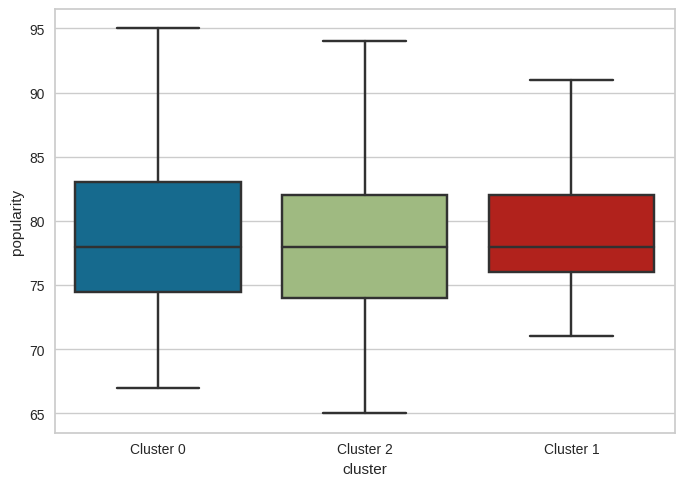

In [ ]:
sns.boxplot(data=cl_df, x='cluster', y='popularity', showfliers=False)
plt.show()

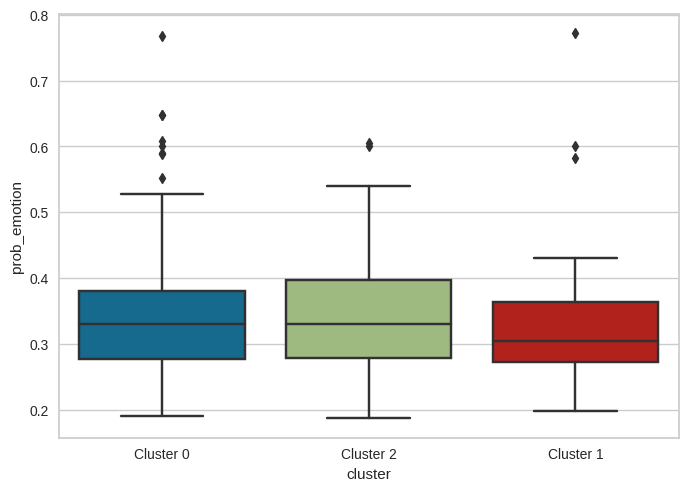

In [ ]:
sns.boxplot(data=cl_df, x='cluster', y='prob_emotion', showfliers=True)
plt.show()

In [37]:
cl_df.head()

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,added_year,added_month,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion,cluster
0,Old Town Road - Remix,Lil Nas X,80.0000,0.8780,0.6190,6.0000,-5.5600,1.0000,0.1020,0.0533,0.0000,0.1130,0.6390,136.0410,audio_features,157067.0000,2019,6,Fri,0.2326,0.1462,0.1521,0.1685,0.1606,0.1400,0.2326,anger,Cluster 0
1,bad guy,Billie Eilish,85.0000,0.7010,0.4250,7.0000,-10.9650,1.0000,0.3750,0.3280,0.1300,0.1000,0.5620,135.1280,audio_features,194088.0000,2019,3,Fri,0.1875,0.4216,0.0829,0.1049,0.1563,0.0468,0.4216,disgust,Cluster 0
2,Señorita,Shawn Mendes,83.0000,0.7590,0.5480,9.0000,-6.0490,0.0000,0.0290,0.0392,0.0000,0.0828,0.7490,116.9670,audio_features,190800.0000,2019,6,Wed,0.0621,0.1040,0.1029,0.3070,0.2871,0.1370,0.3070,joy,Cluster 0
3,7 rings,Ariana Grande,86.0000,0.7780,0.3170,1.0000,-10.7320,0.0000,0.3340,0.5920,0.0000,0.0881,0.3270,140.0480,audio_features,178627.0000,2019,2,Fri,0.1498,0.1581,0.0432,0.3070,0.2170,0.1249,0.3070,joy,Cluster 0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,87.0000,0.7550,0.5220,2.0000,-4.3680,1.0000,0.0575,0.5330,0.0000,0.0685,0.9250,89.9600,audio_features,157560.0000,2019,9,Fri,0.1850,0.1961,0.1715,0.0814,0.2065,0.1596,0.2065,sadness,Cluster 0


In [42]:
cl_df.sort_values('popularity', ascending=False).iloc[:20].groupby('cluster').size()

cluster
Cluster 0    10
Cluster 1     1
Cluster 2     9
dtype: int64

In [45]:
cl_df.groupby('cluster')['pred_emotion'].value_counts()

cluster    pred_emotion
Cluster 0  anger           72
           sadness         46
           joy             36
           disgust         22
           surprise        21
           fear            10
Cluster 1  anger           15
           surprise        10
           disgust          8
           joy              8
           sadness          8
           fear             4
Cluster 2  anger           70
           sadness         53
           joy             44
           surprise        34
           disgust         24
           fear            14
Name: pred_emotion, dtype: int64

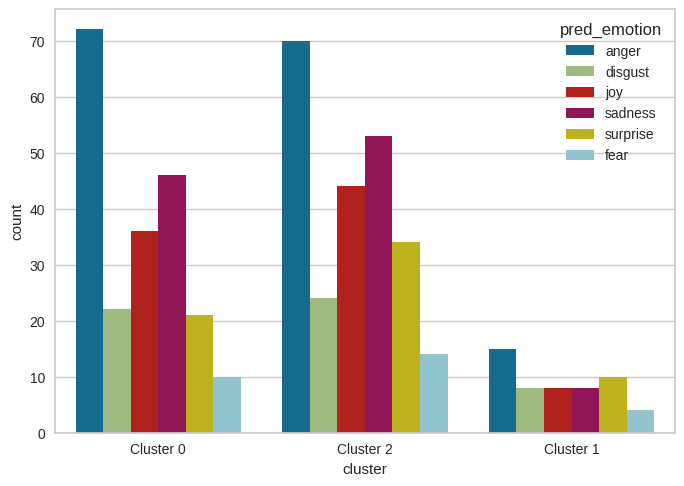

In [47]:
sns.countplot(data=cl_df, x='cluster', hue='pred_emotion')
plt.show()

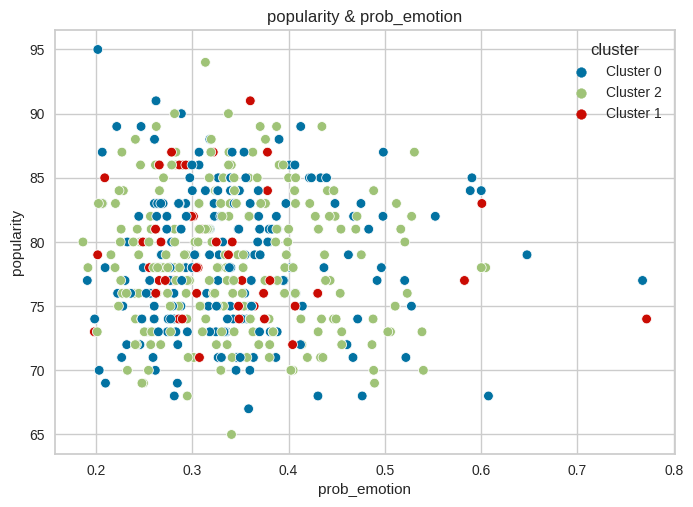

In [49]:
# 산점도 그리기
sns.scatterplot(data=cl_df, x='prob_emotion', y='popularity', hue='cluster')
plt.xlabel('prob_emotion')
plt.ylabel('popularity')
plt.title('popularity & prob_emotion')
plt.show()

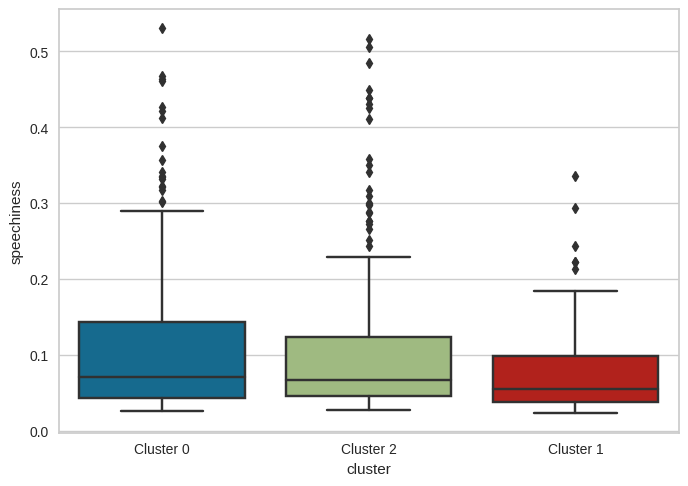

In [55]:
sns.boxplot(data=cl_df, x='cluster', y='speechiness', showfliers=True)
plt.show()

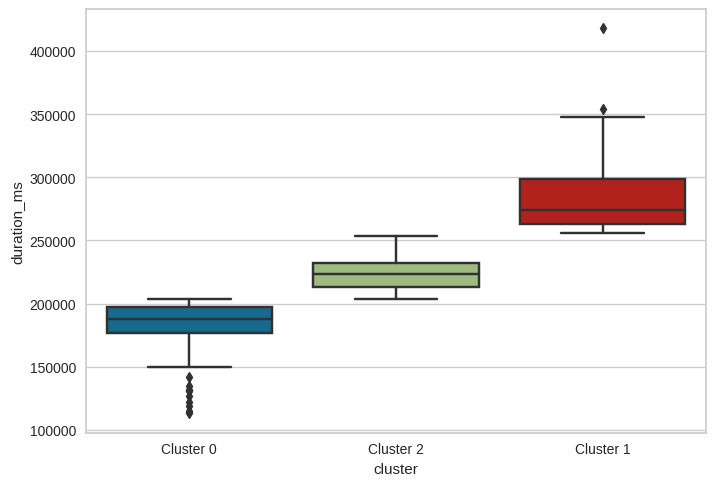

In [61]:
sns.boxplot(data=cl_df, x='cluster', y='duration_ms', showfliers=True)
plt.show()

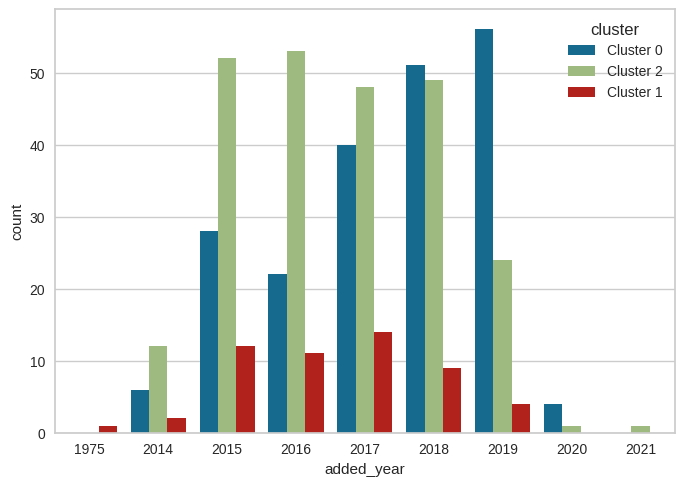

In [63]:
sns.countplot(data=cl_df, x='added_year', hue='cluster')
plt.show()

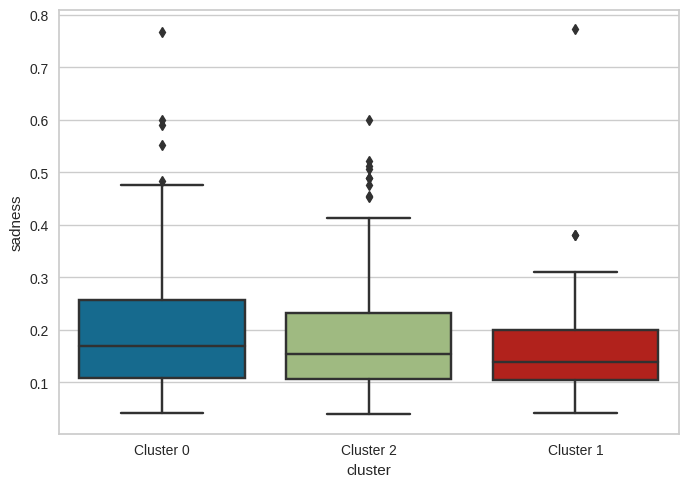

In [71]:
sns.boxplot(data=cl_df, x='cluster', y='sadness', showfliers=True)
plt.show()

In [74]:
cl_df[cl_df['added_year']<2015]

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,added_year,added_month,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion,cluster
73,Bohemian Rhapsody - Remastered 2011,Queen,76.0000,0.3920,0.4020,0.0000,-9.9610,0.0000,0.0536,0.2880,0.0000,0.2430,0.2280,143.8830,audio_features,354320.0000,1975,11,Fri,0.3045,0.1447,0.1604,0.0430,0.2674,0.0799,0.3045,anger,Cluster 1
401,Thinking out Loud,Ed Sheeran,86.0000,0.7810,0.4450,2.0000,-6.0610,1.0000,0.0295,0.4740,0.0000,0.1840,0.5910,78.9980,audio_features,281560.0000,2014,6,Sat,0.2068,0.1310,0.0573,0.2933,0.1975,0.1141,0.2933,joy,Cluster 1
405,"Earned It (Fifty Shades Of Grey) - From The ""F...",The Weeknd,78.0000,0.6590,0.3810,2.0000,-5.9220,0.0000,0.0304,0.3850,0.0000,0.0972,0.4260,119.8440,audio_features,252227.0000,2014,12,Tue,0.3097,0.0827,0.0609,0.3260,0.1182,0.1025,0.3260,joy,Cluster 2
407,The Nights,Avicii,89.0000,0.5270,0.8350,6.0000,-5.2980,1.0000,0.0433,0.0166,0.0000,0.2490,0.6540,125.9830,audio_features,176658.0000,2014,1,Wed,0.0876,0.0857,0.2270,0.4126,0.1030,0.0841,0.4126,joy,Cluster 0
410,Blank Space,Taylor Swift,83.0000,0.7530,0.6780,5.0000,-5.4210,1.0000,0.0644,0.0850,0.0000,0.1300,0.5830,96.0060,audio_features,231827.0000,2014,10,Mon,0.1518,0.1809,0.1826,0.2202,0.1079,0.1567,0.2202,joy,Cluster 2
414,Shut Up and Dance,WALK THE MOON,86.0000,0.5780,0.8660,1.0000,-3.8040,1.0000,0.0619,0.0070,0.0000,0.2570,0.6190,128.0380,audio_features,199080.0000,2014,12,Tue,0.4066,0.1705,0.1413,0.0580,0.0987,0.1250,0.4066,anger,Cluster 0
415,One Last Time,Ariana Grande,86.0000,0.6280,0.5930,8.0000,-5.0360,1.0000,0.0323,0.0930,0.0000,0.0960,0.1040,125.0260,audio_features,197267.0000,2014,8,Mon,0.2997,0.1654,0.0457,0.1074,0.2888,0.0929,0.2997,anger,Cluster 0
418,Time of Our Lives,Pitbull,84.0000,0.7210,0.8020,1.0000,-5.7970,1.0000,0.0583,0.0921,0.0000,0.6940,0.7240,124.0220,audio_features,229360.0000,2014,11,Fri,0.1617,0.1536,0.0974,0.1673,0.2239,0.1961,0.2239,sadness,Cluster 2
419,Outside (feat. Ellie Goulding),Calvin Harris,84.0000,0.6460,0.8230,2.0000,-4.1230,0.0000,0.0394,0.2130,0.0000,0.3220,0.4180,128.0350,audio_features,227267.0000,2014,10,Fri,0.1956,0.0774,0.1120,0.0976,0.1736,0.3438,0.3438,surprise,Cluster 2
426,Style,Taylor Swift,82.0000,0.5980,0.7860,2.0000,-5.5720,1.0000,0.0383,0.0025,0.0016,0.1170,0.4560,95.0190,audio_features,231000.0000,2014,10,Mon,0.2239,0.1776,0.1106,0.0798,0.0772,0.3309,0.3309,surprise,Cluster 2


In [80]:
cl_df[cl_df['prob_emotion'] >= 0.5]['popularity'].max()

87.0

In [81]:
cl_df[cl_df['prob_emotion'] < 0.5]['popularity'].max()

95.0

### 감정의 복합적 - 단순명확

In [83]:
cl_df.iloc[cl_df['anger'].idxmax()]

track_name          I Don't Fuck With You
artist_name                      Big Sean
popularity                        77.0000
danceability                       0.8240
energy                             0.7330
key                                1.0000
loudness                          -5.4740
mode                               1.0000
speechiness                        0.0613
acousticness                       0.0362
instrumentalness                   0.0000
liveness                           0.3250
valence                            0.3950
tempo                             97.9720
type                       audio_features
duration_ms                   284387.0000
added_year                           2015
added_month                             2
added_day                             Tue
anger                              0.5827
disgust                            0.1800
fear                               0.0326
joy                                0.0516
sadness                           

In [122]:
anger = cl_df[cl_df['pred_emotion']=='sadness']
anger['second_emotion'] = anger[['disgust','fear','joy','anger','surprise']].idxmax(axis=1)
anger['second_prob'] = anger[['disgust','fear','joy','anger','surprise']].max(axis=1)

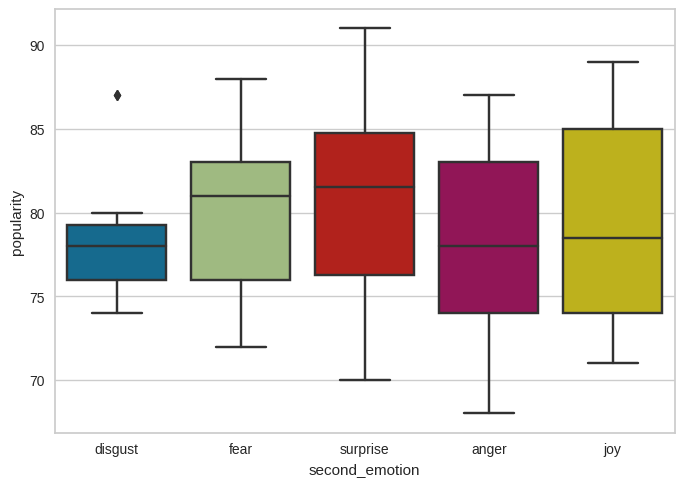

In [123]:
sns.boxplot(data=anger, x='second_emotion', y='popularity', showfliers=True)
plt.show()

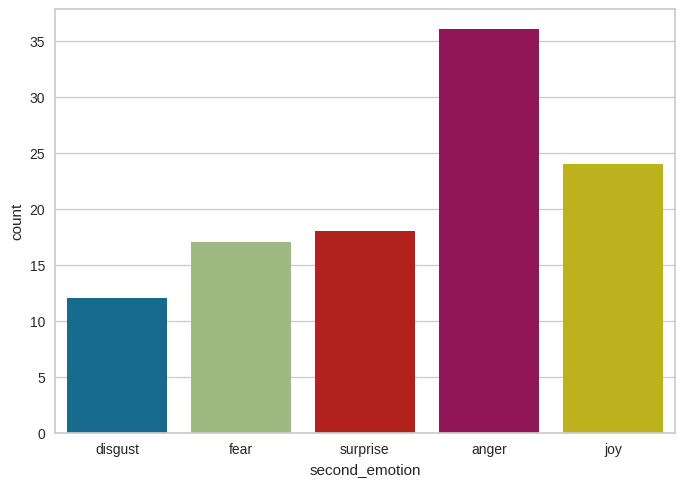

In [124]:
sns.countplot(data=anger, x='second_emotion')
plt.show()

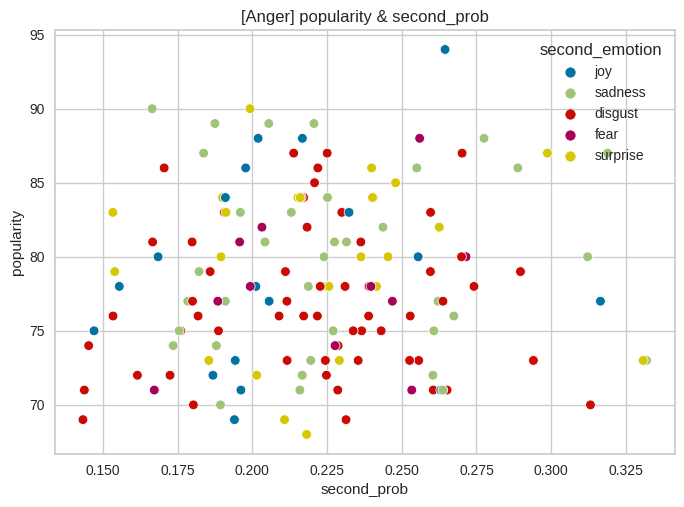

In [107]:
sns.scatterplot(data=anger, x='second_prob', y='popularity', hue='second_emotion')
plt.xlabel('second_prob')
plt.ylabel('popularity')
plt.title('[Anger] popularity & second_prob')
plt.show()

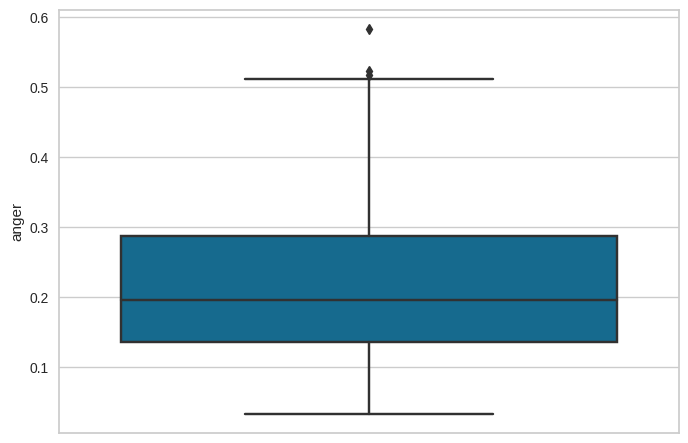

In [84]:
sns.boxplot(data=cl_df, y='anger', showfliers=True)
plt.show()

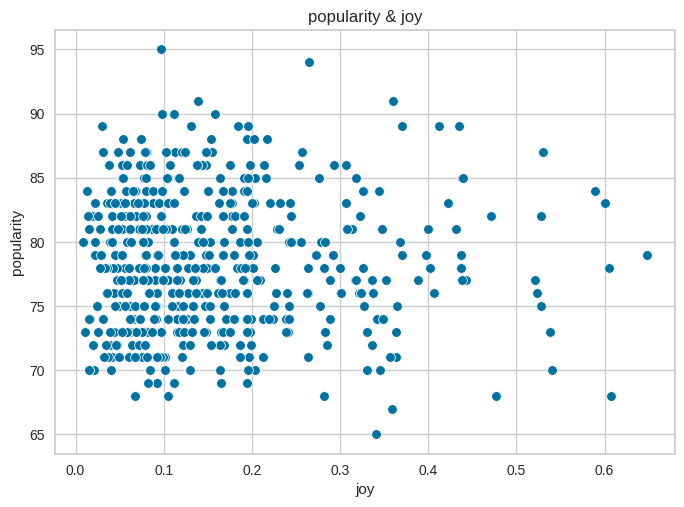

In [117]:
# 산점도 그리기
x_col = 'joy'
sns.scatterplot(data=cl_df, x=x_col, y='popularity')
plt.xlabel(f'{x_col}')
plt.ylabel('popularity')
plt.title(f'popularity & {x_col}')
plt.show()